# **EXPLORING EFFECTIVENESS OF HETEROSCEDASTICITY ELIMINATION METHODS IN REGRESSION MODELS USING PYTHON**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!git clone https://github.com/abdulazizdatasc/Loyihalar.git

Cloning into 'Loyihalar'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 95 (delta 29), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (95/95), 16.93 MiB | 4.59 MiB/s, done.
Resolving deltas: 100% (29/29), done.
Updating files: 100% (32/32), done.


In [ ]:
df = pd.read_csv('/content/Loyihalar/BIKE DETAILS.csv')
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
df.shape

(1061, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [ ]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [ ]:
df.describe(include='object')

,name,seller_type,owner
count,1061,1061,1061
unique,279,2,4
top,Bajaj Pulsar 150,Individual,1st owner
freq,41,1055,924


In [ ]:
pd.DataFrame(round(df.isnull().sum()/df.shape[0]*100, 2), columns=['NaN percentage']) # NaN qiymatlarning foizdagi ifodasi

,NaN percentage
name,0.0
selling_price,0.0
year,0.0
seller_type,0.0
owner,0.0
km_driven,0.0
ex_showroom_price,41.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [ ]:
df.seller_type.value_counts()

,count
seller_type,
Individual,1055
Dealer,6


In [ ]:
df.name.value_counts()

,count
name,
Bajaj Pulsar 150,41
Royal Enfield Classic 350,27
Honda Activa [2000-2015],23
Honda CB Hornet 160R,22
Bajaj Pulsar 180,20
...,...
Hero Honda CD100SS,1
Royal Enfield Thunderbird 500,1
BMW G310GS,1


<ipython-input-13-13dad4bf6fbd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='seller_type', data=df, palette='viridis')


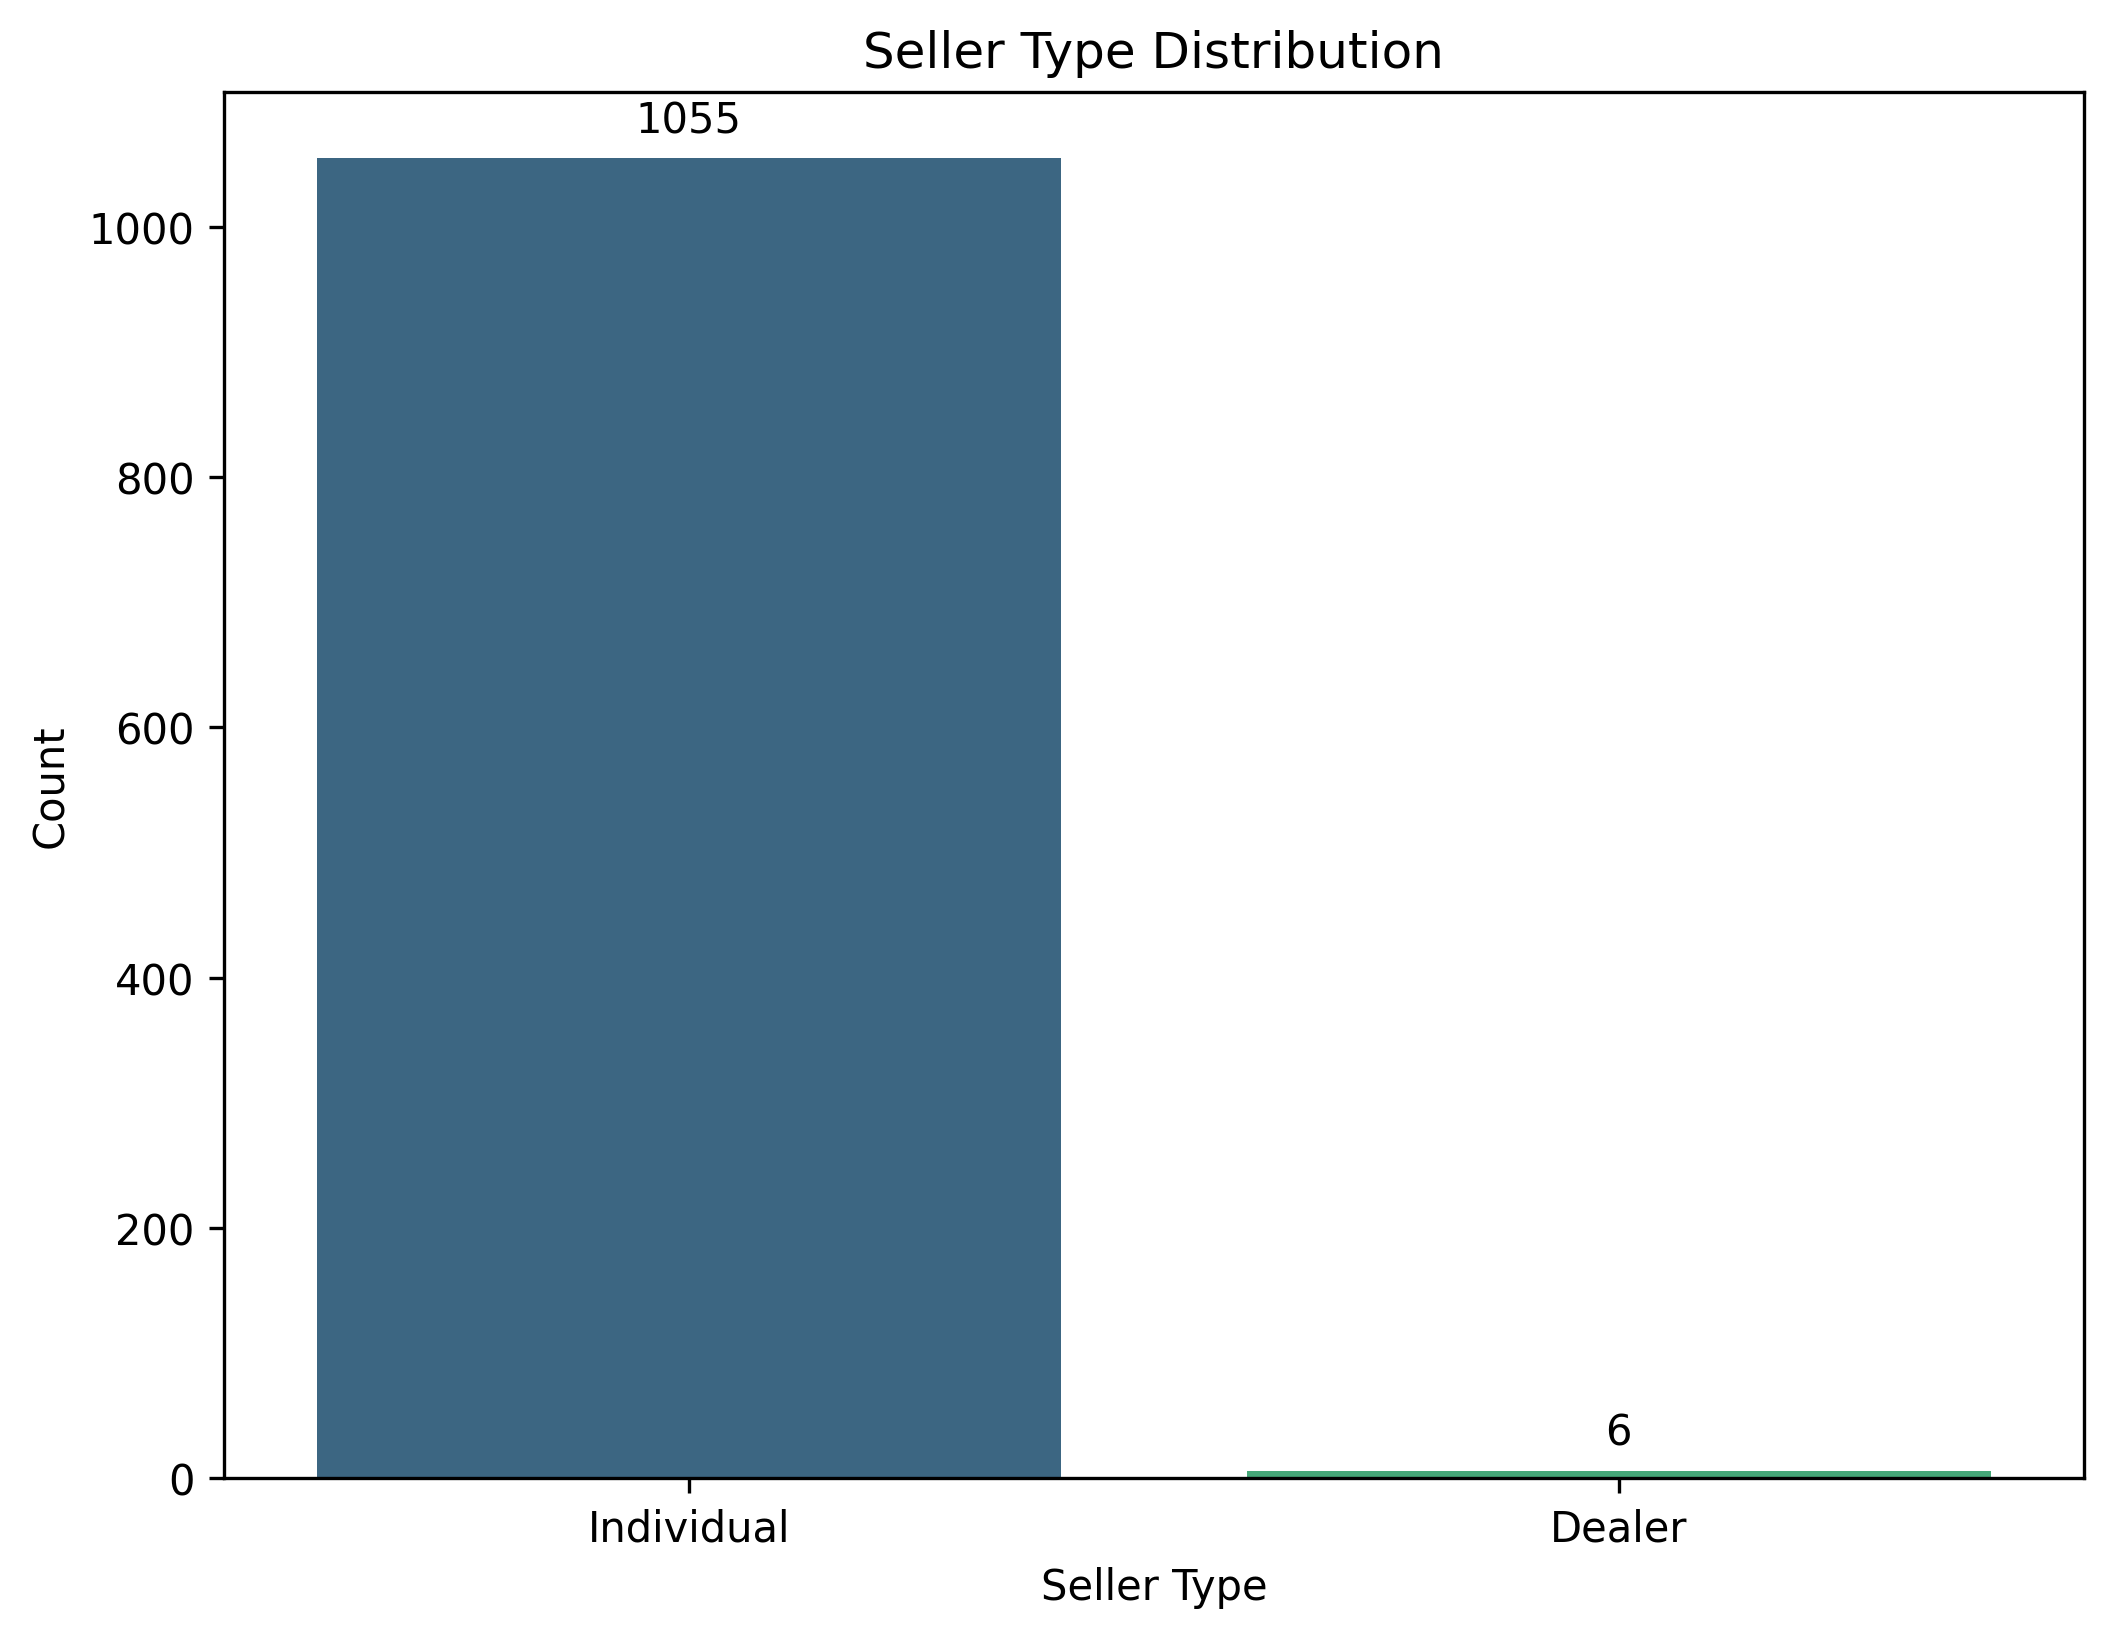

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)
ax = sns.countplot(x='seller_type', data=df, palette='viridis')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.title('Seller Type Distribution')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.show()

<ipython-input-14-752789d7e37f>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


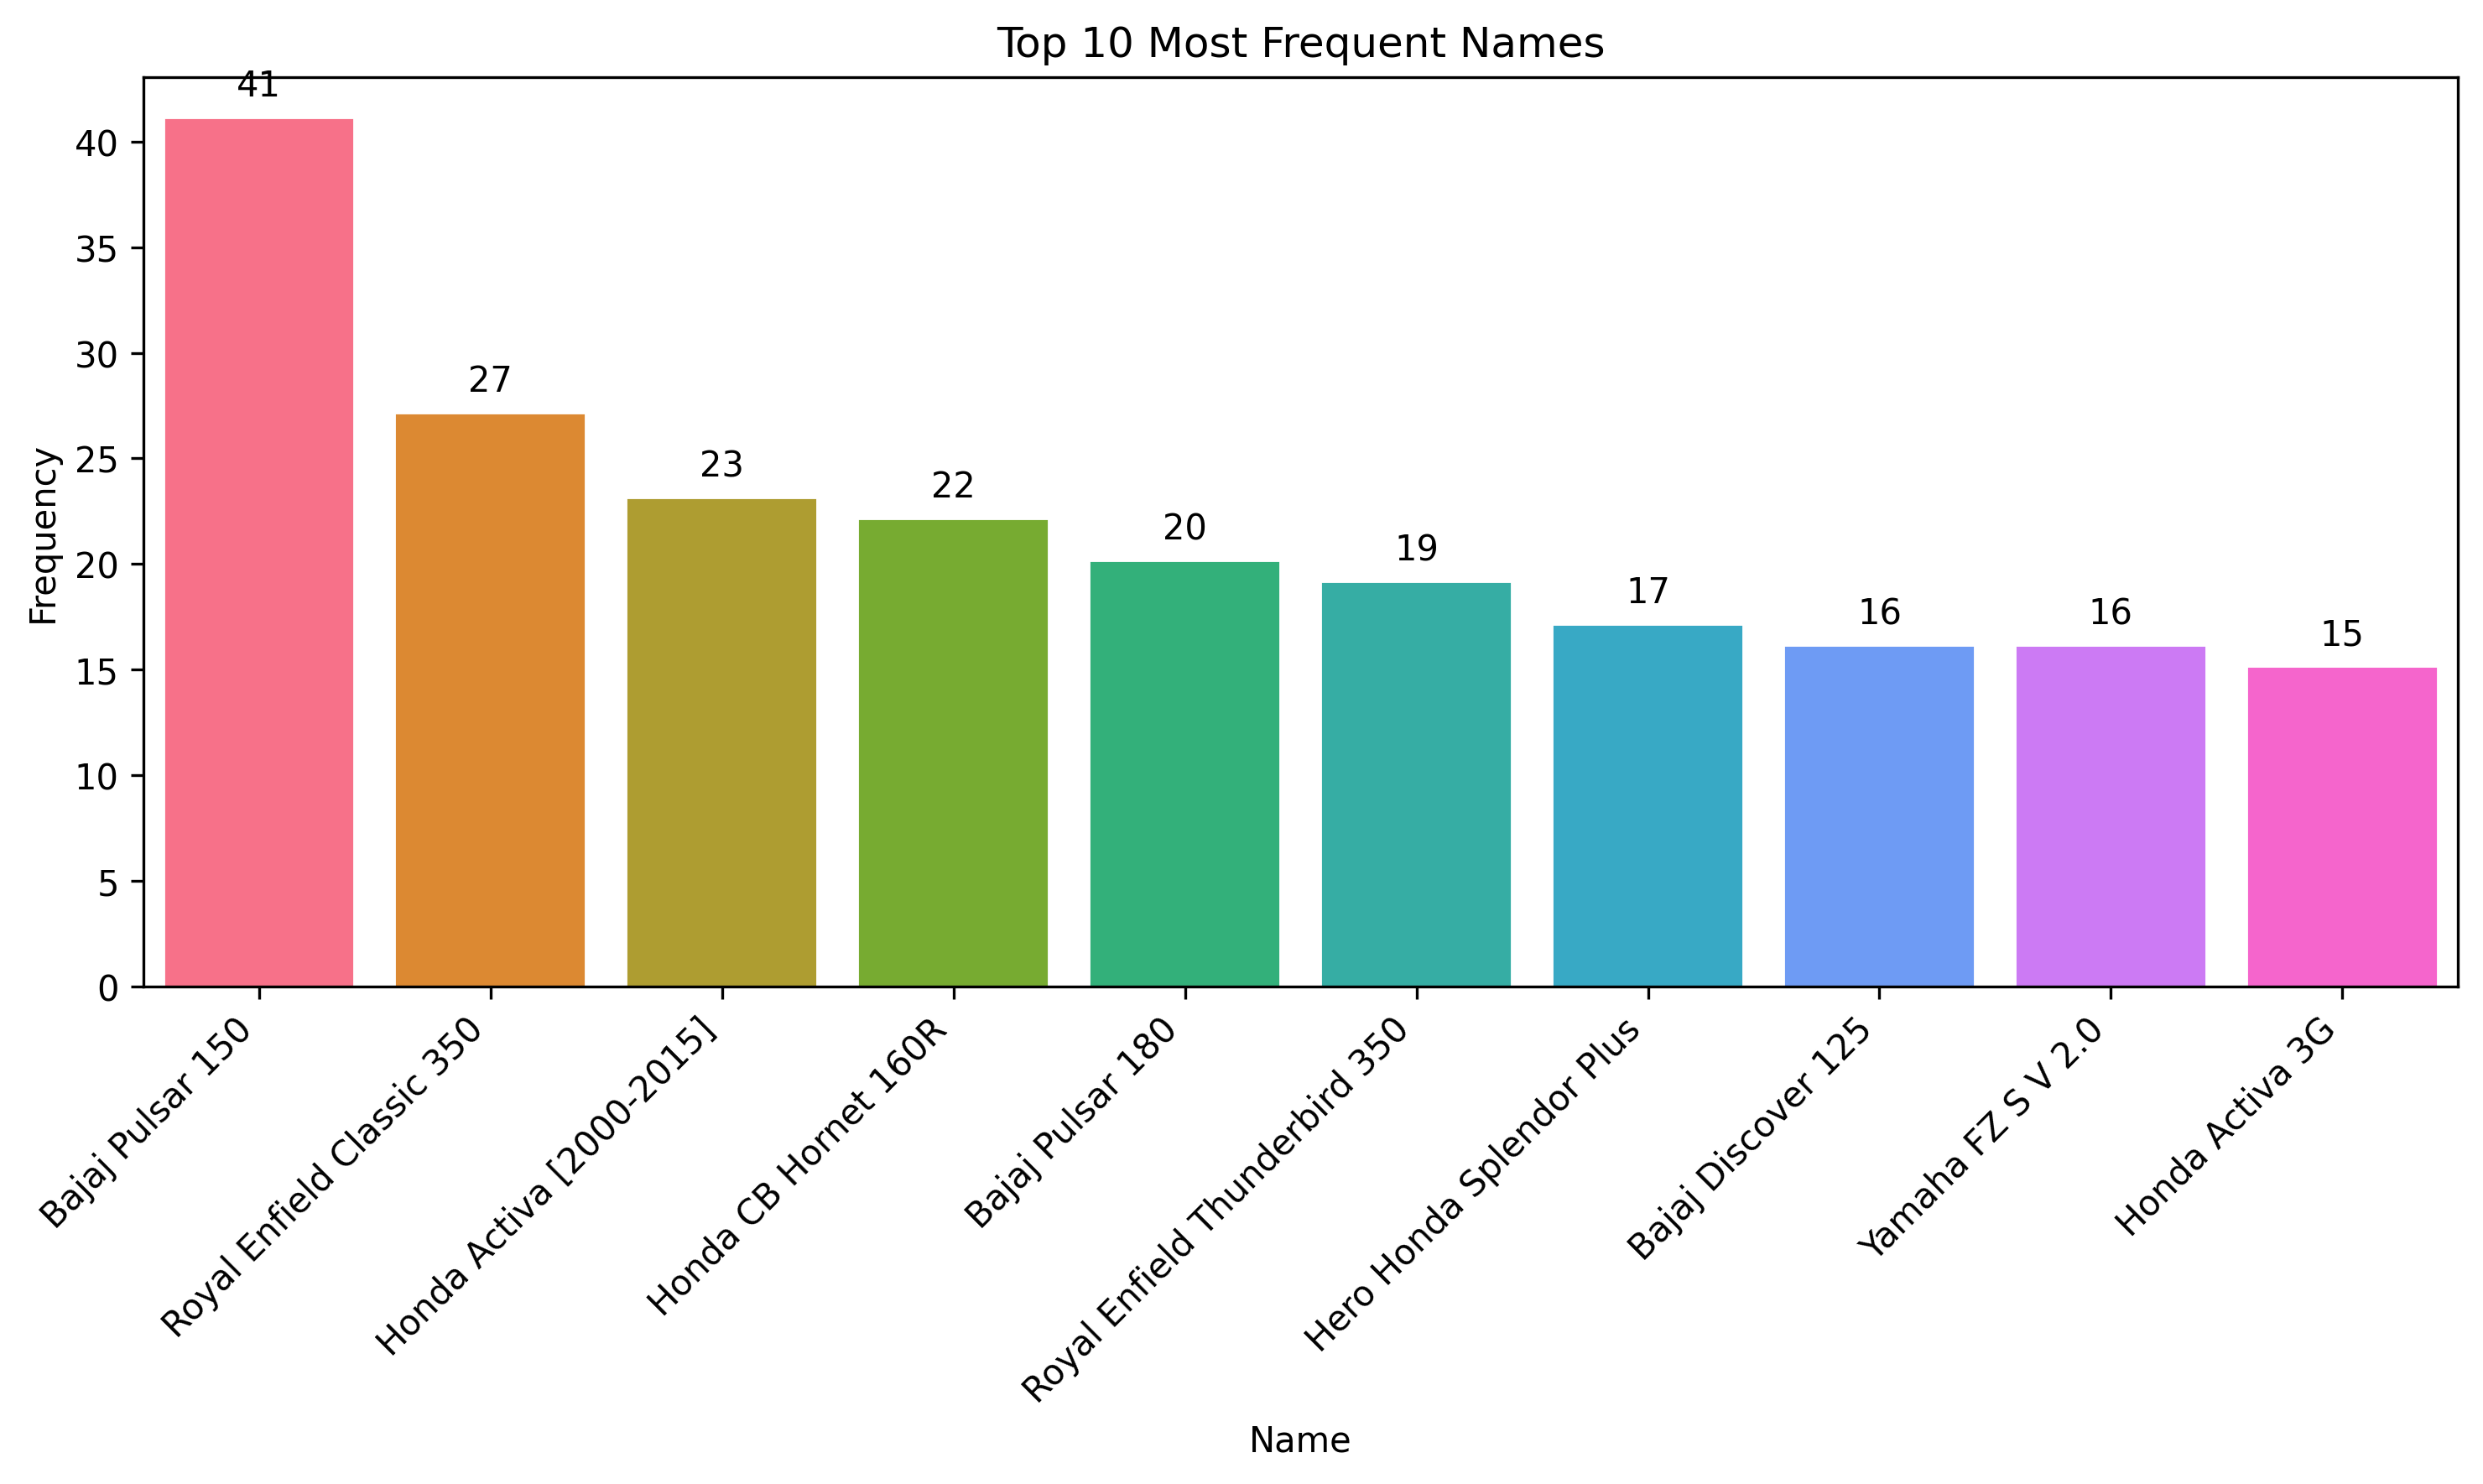

In [ ]:
plt.figure(figsize=(10, 6), dpi=300)
ax = sns.countplot(x='name', data=df, order=df.name.value_counts()[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

colors = sns.color_palette('husl', len(df.name.value_counts()[:10].index))
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

plt.title('Top 10 Most Frequent Names')
plt.xlabel('Name')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

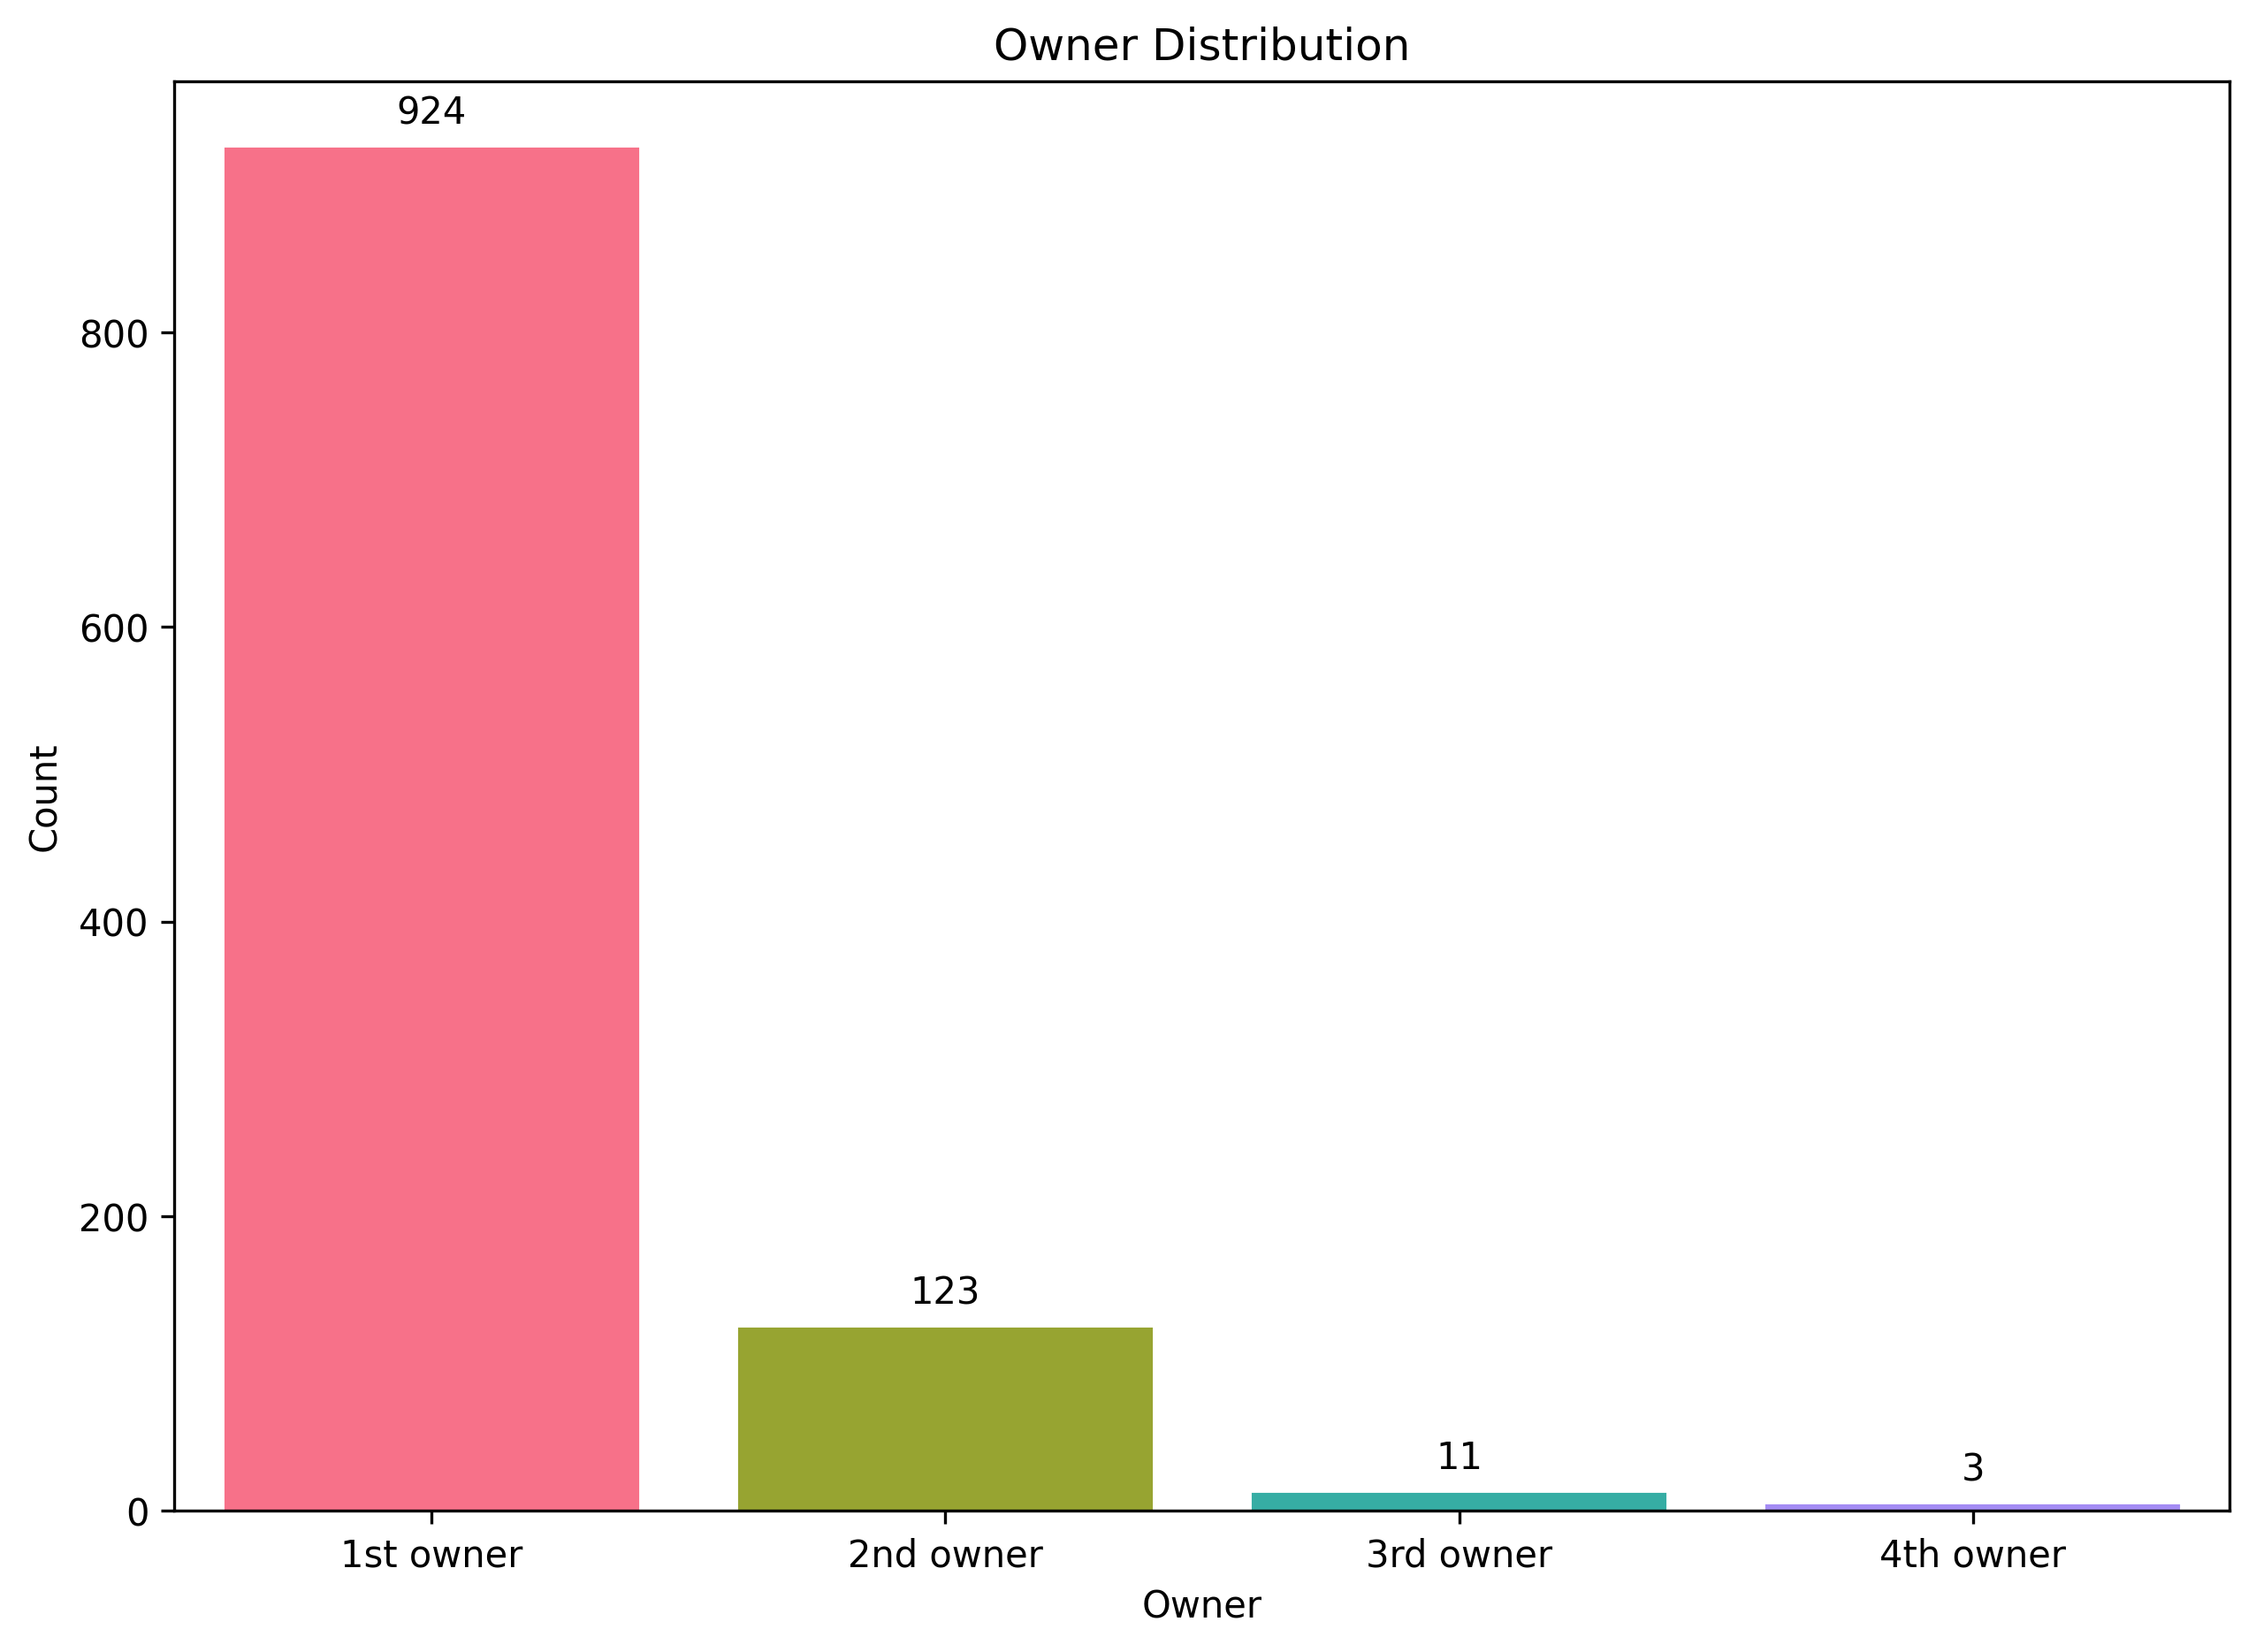

In [ ]:
plt.figure(figsize=(10, 7), dpi=300)
ax = sns.countplot(x='owner', data=df)
plt.title('Owner Distribution')
plt.xlabel('Owner')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

colors = sns.color_palette('husl', len(df.owner.value_counts().index))
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

plt.show()

In [ ]:
df.owner.value_counts()

,count
owner,
1st owner,924
2nd owner,123
3rd owner,11
4th owner,3


In [ ]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['seller_type'] = le.fit_transform(df['seller_type'])

In [ ]:
df['owner'] = le.fit_transform(df['owner'])

In [ ]:
df['name'] = le.fit_transform(df['name'])

In [ ]:
df.describe()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,125.436381,59638.151744,2013.867107,0.994345,0.145146,34359.833176,8.795871e+04
std,76.726388,56304.291973,4.301191,0.075022,0.402407,51623.152702,7.749659e+04
min,0.000000,5000.000000,1988.000000,0.000000,0.000000,350.000000,3.049000e+04
25%,54.000000,28000.000000,2011.000000,1.000000,0.000000,13500.000000,5.485200e+04
50%,126.000000,45000.000000,2015.000000,1.000000,0.000000,25000.000000,7.275250e+04
75%,183.000000,70000.000000,2017.000000,1.000000,0.000000,43000.000000,8.703150e+04
max,278.000000,760000.000000,2020.000000,1.000000,3.000000,880000.000000,1.278000e+06


<Axes: >

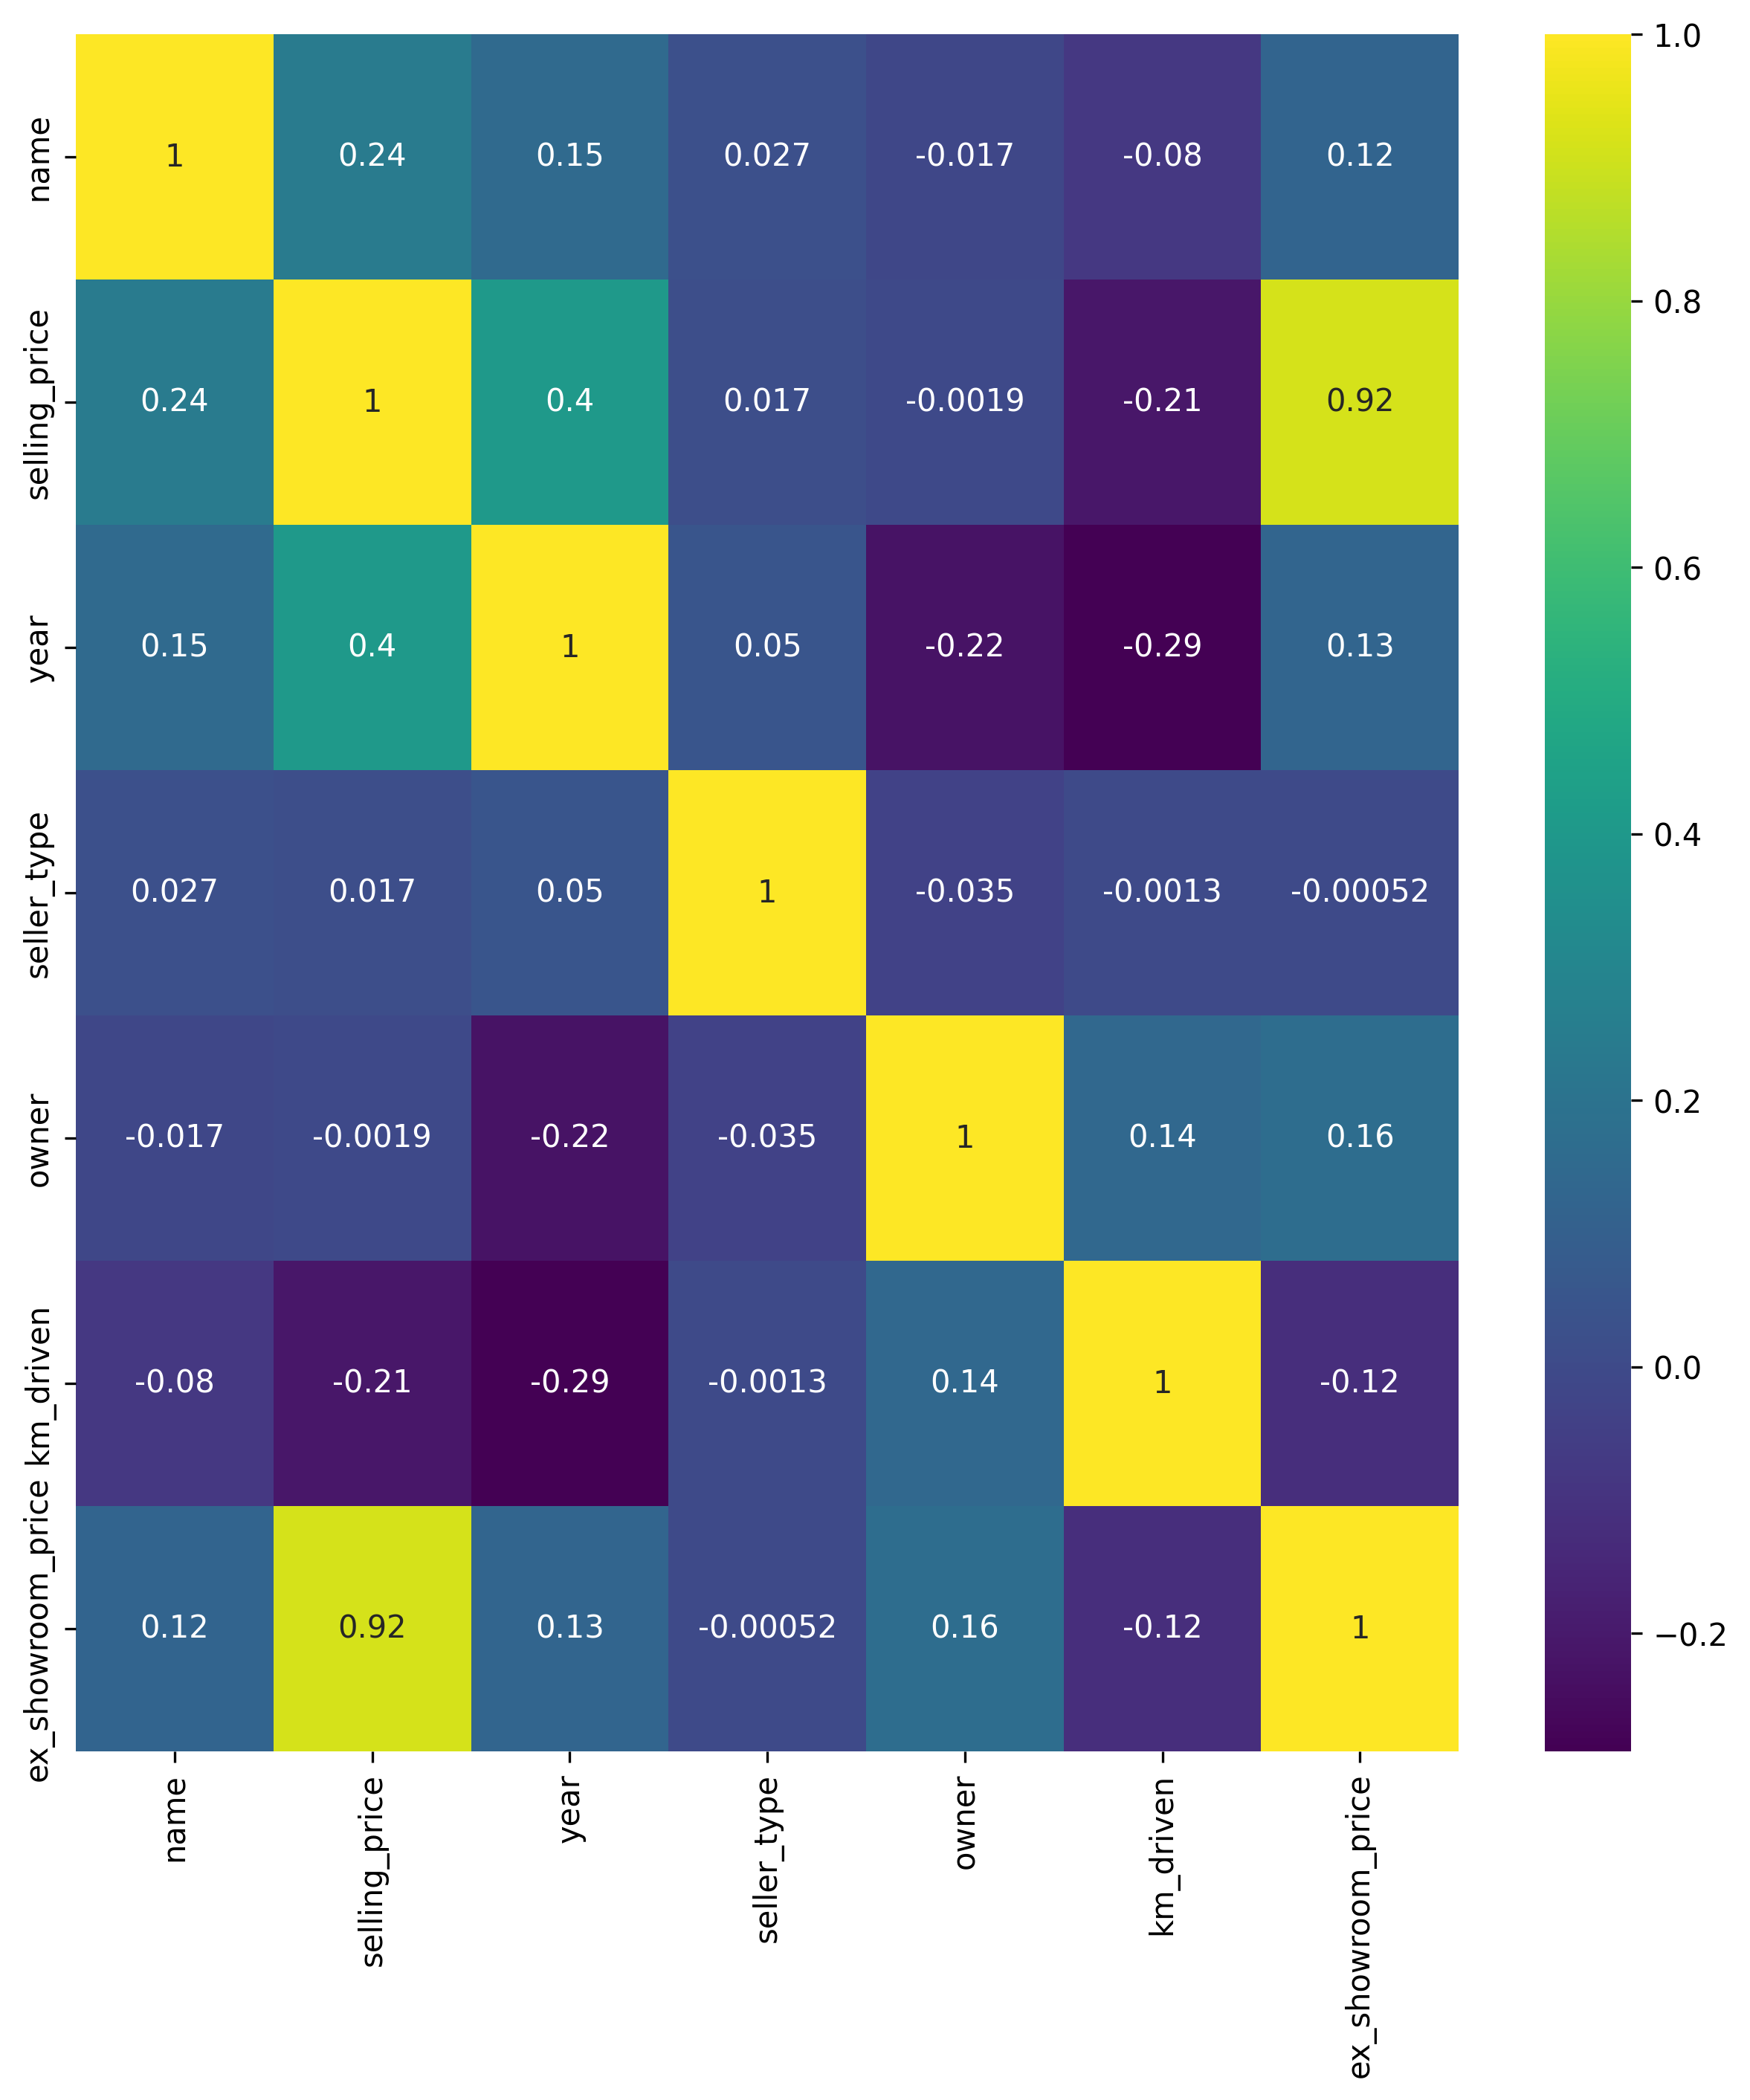

In [ ]:
plt.figure(figsize=(10,10), dpi=300)
import seaborn as sns
sns.heatmap(df.corr(), annot = True, cmap='viridis')

In [ ]:
df.corr()['selling_price']

,selling_price
name,0.240224
selling_price,1.000000
year,0.402188
seller_type,0.017382
owner,-0.001927
km_driven,-0.212937
ex_showroom_price,0.918583


In [ ]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,179,175000,2019,1,0,350,NaN
1,145,45000,2017,1,0,5650,NaN
2,183,150000,2018,1,0,12000,148114.0
3,260,65000,2015,1,0,23000,89643.0
4,269,20000,2011,1,1,21000,NaN
...,...,...,...,...,...,...,...
1056,0,17000,2010,1,0,500000,52000.0
1057,140,16000,2012,1,0,33000,51000.0
1058,21,15000,2013,1,1,35000,57000.0
1059,132,12000,2009,1,0,53000,58000.0


In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

df['ex_showroom_price'] = imputer.fit_transform(df[['ex_showroom_price']])

In [ ]:
df.corr()['selling_price']

,selling_price
name,0.240224
selling_price,1.000000
year,0.402188
seller_type,0.017382
owner,-0.001927
km_driven,-0.212937
ex_showroom_price,0.750451


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_goldfeldquandt

X = df.drop('selling_price', axis=1)
y = df['selling_price']

X_with_const = sm.add_constant(X)
gq_test = het_goldfeldquandt(y, X_with_const)

gq_statistic = gq_test[0]
gq_p_value = gq_test[1]
print(f"Goldfeld-Quandt test statistic: {gq_statistic}")
print(f"p-value: {gq_p_value}")

Goldfeld-Quandt test statistic: 0.42689235732076825
p-value: 0.9999999999999999


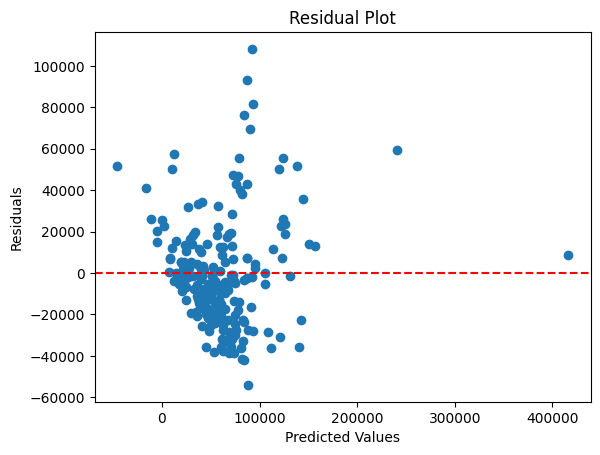

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred


plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_pred, y_test))

0.6342155442887522


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform the Breusch-Pagan test
X_with_const = sm.add_constant(X)  # Add a constant to the model
lm = sm.OLS(y, X_with_const).fit()
bp_test = het_breuschpagan(lm.resid, lm.model.exog)

bp_statistic = bp_test[0]
bp_p_value = bp_test[1]

print(f"Breusch-Pagan test statistic: {bp_statistic}")
print(f"p-value: {bp_p_value}")

Breusch-Pagan test statistic: 97.84125174612589
p-value: 7.075325353269435e-19


In [ ]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)


model_log = LinearRegression()
model_log.fit(X_train, y_train_log)


y_pred_log = model_log.predict(X_test)

residuals_log = y_test_log - y_pred_log

X_with_const = sm.add_constant(X_test)
lm_log = sm.OLS(y_test_log, X_with_const).fit()
bp_test_log = het_breuschpagan(lm_log.resid, lm_log.model.exog)

bp_statistic_log = bp_test_log[0]
bp_p_value_log = bp_test_log[1]

print(f"Breusch-Pagan test statistic (Log-transformed): {bp_statistic_log}")
print(f"p-value (Log-transformed): {bp_p_value_log}")

Breusch-Pagan test statistic (Log-transformed): 56.64485851903153
p-value (Log-transformed): 2.1557578288808724e-10


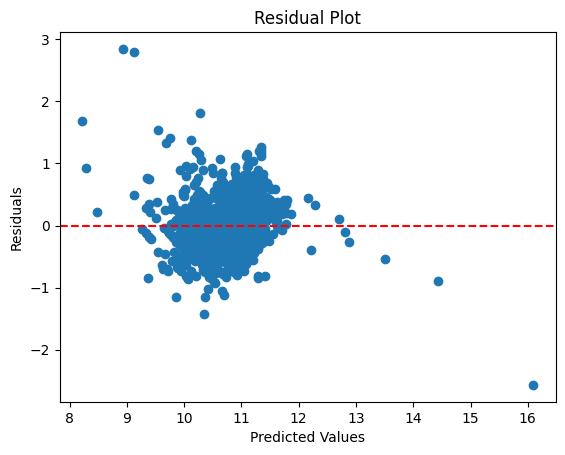

In [ ]:
import numpy as np

y_log = np.log(y)

model_log = LinearRegression()
model_log.fit(X, y_log)

y_pred_log = model_log.predict(X)
residuals_log = y_log - y_pred_log
plt.scatter(y_pred_log, residuals_log)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

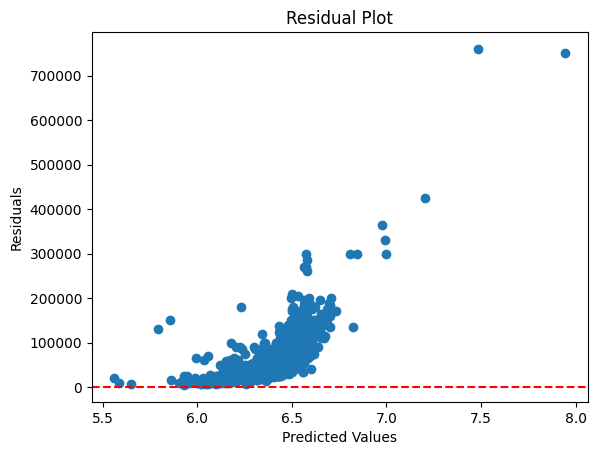

In [ ]:
from scipy.stats import boxcox

y_boxcox, lambda_val = boxcox(y + 1)

model_boxcox = LinearRegression()
model_boxcox.fit(X, y_boxcox)
y_pred_boxcox = model_boxcox.predict(X)
residuals_box = y - y_pred_boxcox

plt.scatter(y_pred_boxcox, residuals_box)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
X_with_const_boxcox = sm.add_constant(X)
lm_boxcox = sm.OLS(y_boxcox, X_with_const_boxcox).fit()
bp_test_boxcox = het_breuschpagan(lm_boxcox.resid, lm_boxcox.model.exog)

bp_statistic_boxcox = bp_test_boxcox[0]
bp_p_value_boxcox = bp_test_boxcox[1]

print(f"Breusch-Pagan test statistic (Box-Cox transformed): {bp_statistic_boxcox}")
print(f"p-value (Box-Cox transformed): {bp_p_value_boxcox}")

Breusch-Pagan test statistic (Box-Cox transformed): 200.37059922142225
p-value (Box-Cox transformed): 1.5824298820135276e-40


In [ ]:
import statsmodels.api as sm

lm = sm.OLS(y, sm.add_constant(X)).fit()
residuals = lm.resid
weights = 1 / (residuals**2)

wls_model = sm.WLS(y, sm.add_constant(X), weights=weights)
wls_results = wls_model.fit()
print(wls_results.summary())

                            WLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.681e+05
Date:                Tue, 05 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:28:31   Log-Likelihood:                -11315.
No. Observations:                1061   AIC:                         2.264e+04
Df Residuals:                    1054   BIC:                         2.268e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -8.473e+06   2.19e+0

In [ ]:
bp_test = het_breuschpagan(wls_results.resid, wls_results.model.exog)

bp_statistic = bp_test[0]
bp_p_value = bp_test[1]

print(f"Breusch-Pagan test statistic: {bp_statistic}")
print(f"p-value: {bp_p_value}")

Breusch-Pagan test statistic (WLS-transformed): 1.70488891618804
p-value (WLS- transformed): 0.007553888634815543
